# Basit Doğrusal Regresyon
Temel amaç, bağımlı ve bağımsız değişken arasındaki ilişkiyi ifade eden doğrusal fonksiyonu bulmaktır.

In [55]:
from IPython.display import Image
Image(url="./img/doğrusalRegrasyon1.jpg")

In [56]:
Image(url="./img/doğrusalRegrasyon2.jpg")

In [57]:
Image(url="./img/doğrusalRegrasyon3.jpg")

---

In [58]:
import pandas as pd
ad = pd.read_csv("Advertising.csv")
df = ad.copy();
df.head()

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [59]:
df = df.iloc[:,1:len(df)]
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
TV           200 non-null float64
radio        200 non-null float64
newspaper    200 non-null float64
sales        200 non-null float64
dtypes: float64(4)
memory usage: 6.4 KB


In [61]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
TV,200.0,147.0425,85.854236,0.7,74.375,149.75,218.825,296.4
radio,200.0,23.2640,14.846809,0.0,9.975,22.90,36.525,49.6
newspaper,200.0,30.5540,21.778621,0.3,12.750,25.75,45.100,114.0
sales,200.0,14.0225,5.217457,1.6,10.375,12.90,17.400,27.0


In [62]:
df.isnull().values.any()

False

In [63]:
df.corr()

,TV,radio,newspaper,sales
TV,1.000000,0.054809,0.056648,0.782224
radio,0.054809,1.000000,0.354104,0.576223
newspaper,0.056648,0.354104,1.000000,0.228299
sales,0.782224,0.576223,0.228299,1.000000


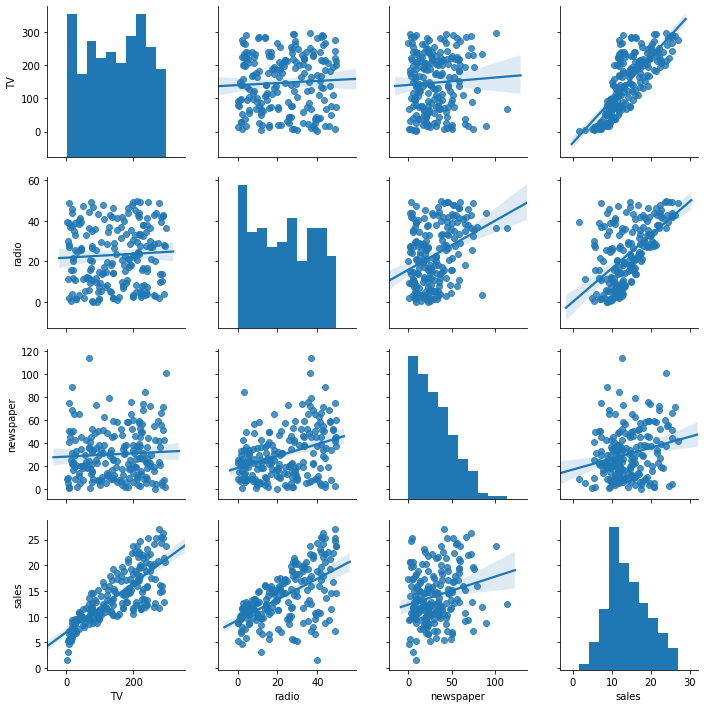

In [64]:
import seaborn as sns
sns.pairplot(df,kind="reg");

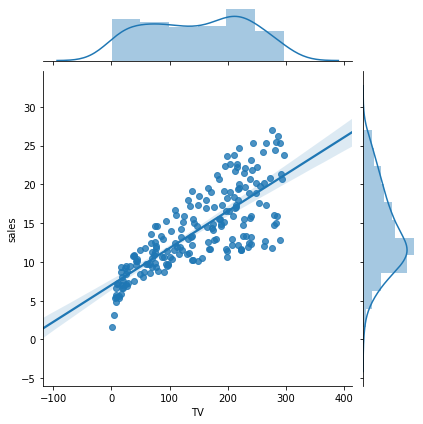

In [65]:
sns.jointplot(x="TV",y="sales",data=df,kind="reg");

Statsmodels İle Modelleme

In [66]:
import statsmodels.api as sm

X = df[["TV"]]
X[0:5]

,TV
0,230.1
1,44.5
2,17.2
3,151.5
4,180.8


In [67]:
X = sm.add_constant(X)
X[0:5]

C:\Users\mfurk\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning:

Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.



,const,TV
0,1.0,230.1
1,1.0,44.5
2,1.0,17.2
3,1.0,151.5
4,1.0,180.8


In [68]:
y = df["sales"]
y[0:5]

0    22.1
1    10.4
2     9.3
3    18.5
4    12.9
Name: sales, dtype: float64

In [69]:
lm = sm.OLS(y,X)

In [70]:
model = lm.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     312.1
Date:                Fri, 20 Mar 2020   Prob (F-statistic):           1.47e-42
Time:                        10:11:22   Log-Likelihood:                -519.05
No. Observations:                 200   AIC:                             1042.
Df Residuals:                     198   BIC:                             1049.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.0326      0.458     15.360      0.000       6.130       7.935
TV             0.0475      0.003     17.668      0.000       0.042       0.053
==============================================================================
Omnibus:                        0.531   Durbin-Watson:                   1.935
Prob(Omnibus):                  0.767   Jarque-Bera (JB):                0.669
Skew:                          -0.089   Prob(JB):                        0.716
Kurtosis:                       2.779   Cond. No.                         338.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

- F-statistic => Modelin anlamlı olup olmadığını verir.
- coef-const noktası => Diğer değişkenlerde hiçbir değişiklik olmadığında beklenen satıştır.
- TV-coef => TV harcalamarında bir birimlik artış olduğunda satışlarda bu kadarlık satış olması beklenir.

In [71]:
import statsmodels.formula.api as smf
lm = smf.ols("sales ~ TV",df)
model = lm.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     312.1
Date:                Fri, 20 Mar 2020   Prob (F-statistic):           1.47e-42
Time:                        10:11:23   Log-Likelihood:                -519.05
No. Observations:                 200   AIC:                             1042.
Df Residuals:                     198   BIC:                             1049.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      7.0326      0.458     15.360      0.000       6.130       7.935
TV             0.0475      0.003     17.668      0.000       0.042       0.053
==============================================================================
Omnibus:                        0.531   Durbin-Watson:                   1.935
Prob(Omnibus):                  0.767   Jarque-Bera (JB):                0.669
Skew:                          -0.089   Prob(JB):                        0.716
Kurtosis:                       2.779   Cond. No.                         338.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [72]:
model.params # model parametreleri

Intercept    7.032594
TV           0.047537
dtype: float64

In [73]:
model.summary().tables[1] # katsayılar

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,7.0326,0.458,15.360,0.000,6.130,7.935
TV,0.0475,0.003,17.668,0.000,0.042,0.053


In [74]:
model.conf_int() # güven aralığı

,0,1
Intercept,6.129719,7.935468
TV,0.042231,0.052843


In [75]:
model.f_pvalue # modelin anlamlılığı

1.4673897001947095e-42

In [76]:
print("f_pvalue: ","%.3f" % model.f_pvalue)

f_pvalue:  0.000


In [77]:
print("f_pvalue: ","%.3f" % model.fvalue)

f_pvalue:  312.145


In [78]:
# parametre anlamlılığı
print("tvalues: ","%.2f" % model.tvalues[0:1])

tvalues:  15.36


In [79]:
# model başarısı
model.mse_model

3314.6181668686486

In [80]:
model.rsquared

0.611875050850071

In [81]:
model.fittedvalues[0:5] # tahmin edilen değerler 

0    17.970775
1     9.147974
2     7.850224
3    14.234395
4    15.627218
dtype: float64

In [82]:
y[0:5] # gerçek değerler

0    22.1
1    10.4
2     9.3
3    18.5
4    12.9
Name: sales, dtype: float64

In [83]:
# gelecek ile ilgili tahmin yapma
print("Sales = " +
      str("%.2f" % model.params[0]) + 
      " + TV" + "*" + 
      str("%.2f" % model.params[1])
     )

Sales = 7.03 + TV*0.05


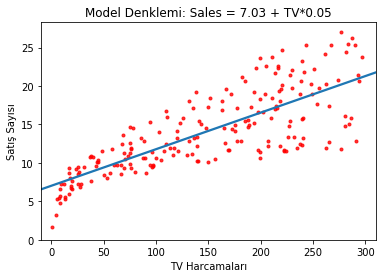

In [84]:
g = sns.regplot(df["TV"], df["sales"], ci=None, scatter_kws={'color':'r', 's':9})
g.set_title("Model Denklemi: Sales = 7.03 + TV*0.05")
g.set_ylabel("Satış Sayısı")
g.set_xlabel("TV Harcamaları")
import matplotlib.pyplot as plt
plt.xlim(-10,310)
plt.ylim(bottom=0);

In [85]:
from sklearn.linear_model import LinearRegression

X = df[["TV"]]
y = df["sales"]
reg = LinearRegression()
model = reg.fit(X, y)
model.intercept_ # katsayı

7.032593549127693

In [86]:
model.coef_ # beta katsayı

array([0.04753664])

In [87]:
model.score(X,y) # r^2 değeri

0.611875050850071

In [88]:
model.predict(X)[0:10]

array([17.97077451,  9.14797405,  7.85022376, 14.23439457, 15.62721814,
        7.44616232,  9.76595037, 12.74649773,  7.44140866, 16.53041431])

---
### Tahmin
**Model Denklemi:** <br>
Sales = 7.03 + TV*0.04 <br>
Örneğin 30 birim TV harcaması olduğunda satışların tahmini değeri ne olur?

In [89]:
7.03 + 30*0.04

8.23

In [90]:
X = df[["TV"]]
y = df["sales"]
reg = LinearRegression()
model = reg.fit(X, y)

In [91]:
model.predict([[30]])

array([8.45869276])

In [92]:
yeni_veri = [[5],[90],[200]]
model.predict(yeni_veri) # satış tahmini

array([ 7.27027675, 11.31089119, 16.53992164])